# Police Force Responses by Crime

In [1]:
#Dependencies
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [2]:
#Import csv file
police_data = pd.read_csv("Resources/Police_Use_of_Force.csv")
police_data.head()

,X,Y,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceReportNumber,...,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,CenterGBSID,CenterLatitude,CenterLongitude,CenterX,CenterY,DateAdded,OBJECTID
0,-93.299256,44.980557,19194596,08-007748,2008/01/08 14:20:21+00,Disturbance,No,DISCON,NaN,1,...,322402,80434.0,2514,15824,44.980557,-93.299256,-10386025.66,5618461.049,2021/02/11 08:18:54+00,1
1,-93.273109,44.979187,19194597,08-019047,2008/01/19 23:47:58+00,On Site,No,NOSMOK,NaN,1,...,322402,46998.0,23458,17239,44.979187,-93.273109,-10383115.01,5618245.449,2021/02/11 08:18:54+00,2
2,-93.311817,45.006028,19194598,08-034409,2008/02/04 21:21:49+00,Property Damage Accident,Yes,ASLT2,NaN,1,...,322402,80434.0,9486,10909,45.006028,-93.311817,-10387423.95,5622470.553,2021/02/11 08:18:54+00,3
3,-93.288860,45.043001,19194599,08-043573,2008/02/14 22:03:15+00,Unwanted Person,Yes,DAMPRP,NaN,2,...,322402,80434.0,3070,17338,45.043001,-93.288860,-10384868.44,5628293.683,2021/02/11 08:18:54+00,4
4,-93.271963,44.981655,19194600,08-052540,2008/02/24 02:25:39+00,Fight,No,OBSTRU,No,3,...,322402,46998.0,23458,17120,44.981655,-93.271963,-10382987.47,5618633.899,2021/02/11 08:18:54+00,5


In [3]:
#create new DataFrame
police_data_df = police_data.loc[:, ["PoliceUseOfForceID", "CaseNumber", "ResponseDate", "Problem", "ForceType",
                                    "ForceTypeAction", "EventAge", "TypeOfResistance", "Precinct", "Neighborhood"]]
police_data_df

,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,ForceType,ForceTypeAction,EventAge,TypeOfResistance,Precinct,Neighborhood
0,19194596,08-007748,2008/01/08 14:20:21+00,Disturbance,Bodily Force,Push Away,13.0,Tensed,4,Harrison
1,19194597,08-019047,2008/01/19 23:47:58+00,On Site,Bodily Force,Push Away,27.0,Tensed,1,Downtown West
2,19194598,08-034409,2008/02/04 21:21:49+00,Property Damage Accident,Bodily Force,Joint Lock,17.0,Verbal Non-Compliance,4,Willard - Hay
3,19194599,08-043573,2008/02/14 22:03:15+00,Unwanted Person,Bodily Force,Body Weight to Pin,18.0,Tensed,4,Lind - Bohanon
4,19194600,08-052540,2008/02/24 02:25:39+00,Fight,Bodily Force,Knees,28.0,Commission of Crime,1,Downtown West
...,...,...,...,...,...,...,...,...,...,...
32030,19226626,09-Cooper,2009/01/01 00:00:00+00,NaN,NaN,0,NaN,NaN,NaN,Cooper
32031,19226627,08-Bottineau,2008/01/01 00:00:00+00,NaN,NaN,0,NaN,NaN,NaN,Bottineau
32032,19226628,09-Loring Park,2009/01/01 00:00:00+00,NaN,NaN,0,NaN,NaN,NaN,Loring Park
32033,19226629,14-Cooper,2014/01/01 00:00:00+00,NaN,NaN,0,NaN,NaN,NaN,Cooper


In [4]:
#drop NaN from Dataframe
police_data_df = police_data_df.dropna(how='any')
police_data_df

,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,ForceType,ForceTypeAction,EventAge,TypeOfResistance,Precinct,Neighborhood
0,19194596,08-007748,2008/01/08 14:20:21+00,Disturbance,Bodily Force,Push Away,13.0,Tensed,4,Harrison
1,19194597,08-019047,2008/01/19 23:47:58+00,On Site,Bodily Force,Push Away,27.0,Tensed,1,Downtown West
2,19194598,08-034409,2008/02/04 21:21:49+00,Property Damage Accident,Bodily Force,Joint Lock,17.0,Verbal Non-Compliance,4,Willard - Hay
3,19194599,08-043573,2008/02/14 22:03:15+00,Unwanted Person,Bodily Force,Body Weight to Pin,18.0,Tensed,4,Lind - Bohanon
4,19194600,08-052540,2008/02/24 02:25:39+00,Fight,Bodily Force,Knees,28.0,Commission of Crime,1,Downtown West
...,...,...,...,...,...,...,...,...,...,...
30829,19225425,20-287806,2020/11/12 14:41:54+00,Domestic Abuse-In Progress,Maximal Restraint Technique,Not Side Recovery Position,19.0,Other ...,2,Waite Park
30830,19225426,20-288772,2020/11/13 21:48:02+00,Unwanted Person,Bodily Force,Body Weight Pin,29.0,Verbal Non-Compliance ...,5,Linden Hills
30831,19225427,20-292656,2020/11/19 15:44:41+00,Emotionally Disturb Person,Taser,Firing Darts,23.0,Other ...,4,Willard - Hay
30832,19225428,20-298833,2020/11/28 08:18:10+00,Motor Vehicle Chase,Bodily Force,Push Away,31.0,Fled in a Vehicle ...,3,East Phillips


In [5]:
#rename rows in ForceTypeAction column
police_data_df['ForceTypeAction'] = police_data_df['ForceTypeAction'].replace({
    "Knee": "Knees",
    "Body Weight Pin": "Body Weight to Pin",
    "Conscious Neck Restraint": "Neck Restraint: subject did not lose conciousness",
    "Punch": "Punches",
    "Slap": "Slaps",
    'Unconscious Neck Restraint': 'Neck Restraint: subject did not lose conciousness',
    'Firearm as striking tool': 'Firearms As Striking Tool'
})


C:\Users\szig9\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [6]:
#rename rows in ForceType column
police_data_df['ForceType'] = police_data_df['ForceType'].replace({
    "Less Lethal Projectile": "Less Lethal"
})

C:\Users\szig9\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#rename rows in TypeOfResistance column
police_data_df['TypeOfResistance'] = police_data_df['TypeOfResistance'].replace({
    "TENSED": "Tensed",
    "tensed": "Tensed",
    "Tensed                                                                         ": "Tensed",
    "verbal non-compliance": "Verbal Non-Compliance",
    "Verbal Non-Compliance                                                          ": "Verbal Non-Compliance",
    "commission of crime":"Commission of Crime",
    "Commission of a Crime                                                          ":"Commission of Crime",
    "COMMISSION OF CRIME":"Commission of Crime",
    "Fled on Foot                                                                   ":"Fled on Foot",
    "Fled in a Vehicle                                                              ":"Fled in Vehicle",
    "Assaulted Officer                                                              ":"Assaulted Officer",
    "Assaulted Police K9                                                            ":"Assaulting Police K9",
    "Other                                                                          ":"Other"
           
})

C:\Users\szig9\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [8]:
#rename columns in Dataframe
clean_df = police_data_df.rename(columns ={
    'PoliceUseOfForceID': "Police ID",
    'CaseNumber': "Case Number",
    'ResponseDate': "Response Date",
    'Problem': "Type of Crime",
    'ForceType': 'Type of Force',
    'ForceTypeAction': 'Type of Force Action',
    'EventAge': 'Event Age',
    'TypeOfResistance': 'Type of Resistance'
})
#reset the index in DataFrame
clean_df.reset_index(drop=True, inplace=True)
clean_df

,Police ID,Case Number,Response Date,Type of Crime,Type of Force,Type of Force Action,Event Age,Type of Resistance,Precinct,Neighborhood
0,19194596,08-007748,2008/01/08 14:20:21+00,Disturbance,Bodily Force,Push Away,13.0,Tensed,4,Harrison
1,19194597,08-019047,2008/01/19 23:47:58+00,On Site,Bodily Force,Push Away,27.0,Tensed,1,Downtown West
2,19194598,08-034409,2008/02/04 21:21:49+00,Property Damage Accident,Bodily Force,Joint Lock,17.0,Verbal Non-Compliance,4,Willard - Hay
3,19194599,08-043573,2008/02/14 22:03:15+00,Unwanted Person,Bodily Force,Body Weight to Pin,18.0,Tensed,4,Lind - Bohanon
4,19194600,08-052540,2008/02/24 02:25:39+00,Fight,Bodily Force,Knees,28.0,Commission of Crime,1,Downtown West
...,...,...,...,...,...,...,...,...,...,...
29070,19225425,20-287806,2020/11/12 14:41:54+00,Domestic Abuse-In Progress,Maximal Restraint Technique,Not Side Recovery Position,19.0,Other,2,Waite Park
29071,19225426,20-288772,2020/11/13 21:48:02+00,Unwanted Person,Bodily Force,Body Weight to Pin,29.0,Verbal Non-Compliance,5,Linden Hills
29072,19225427,20-292656,2020/11/19 15:44:41+00,Emotionally Disturb Person,Taser,Firing Darts,23.0,Other,4,Willard - Hay
29073,19225428,20-298833,2020/11/28 08:18:10+00,Motor Vehicle Chase,Bodily Force,Push Away,31.0,Fled in Vehicle,3,East Phillips


# 1. What incidents result the most in police use of force? (Sam)

In [9]:
test_data = clean_df["Type of Crime"].describe(include="all")
test_data

count                  29075
unique                   131
top       Suspicious Person 
freq                    4845
Name: Type of Crime, dtype: object

In [10]:
incident_data = clean_df.groupby("Type of Crime")
total_count = incident_data.nunique()["Case Number"]

incidents = pd.DataFrame({"Total Count": total_count})
top_incidents = incidents.sort_values("Total Count", ascending=False)

top_incidents.index.name = "Incidents"
top_incidents.head()

,Total Count
Incidents,
Suspicious Person,2341
Fight,1348
Disturbance,1031
Domestic Abuse-In Progress,719
Suspicious Vehicle,570


Text(0, 0.5, 'Number of Cases')

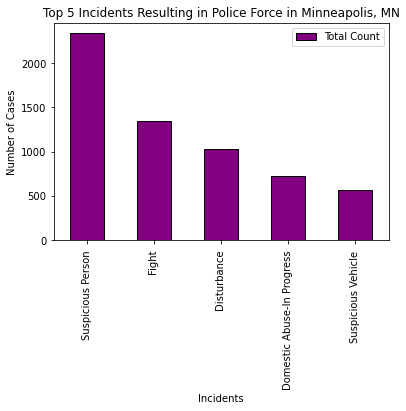

In [11]:
top_incidents.head(5)
top_incidents.head(5).plot(kind="bar", edgecolor="black", facecolor="purple",fontsize=10)
plt.title("Top 5 Incidents Resulting in Police Force in Minneapolis, MN")
plt.ylabel("Number of Cases")

# Incident Analysis:
-When looking at the data, it is evident that the number one incident that results in the use of police force in Minneapolis is when there is a suspicious person (2341).

-There could be many reasons why suspicious person is the number one incident resulting in police force. For instance, the suspect could have been caught in the middle of commiting a crime and will do anything it takes to get out of the situation. Another reason is the suspect could be exhibiting unusual behavior because they are either mentally unstable or on drugs. 

-Since every case is different. It is hard to pinpoint an exact reason why suspicious person is the number one incident resulting in police force. 

In [12]:
# Sam's code ends here

# 2. What type of force is used the most? (Ainash)

In [13]:
#find all types of force
force_type_ainash = clean_df['Type of Force']
force_type_ainash.unique()

array(['Bodily Force', 'Chemical Irritant', 'Taser', 'Improvised Weapon',
       'Baton', 'Police K9 Bite', 'Firearm', 'Less Lethal',
       'Gun Point Display', 'Maximal Restraint Technique'], dtype=object)

In [14]:
# find the most used types of force
force_data_ainash = clean_df[['Type of Force', 'Case Number']]
force_data_groupby_ainash = force_data_ainash.groupby('Type of Force')
force_data_count_ainash = force_data_groupby_ainash['Type of Force'].count()
most_force_type_ainash = pd.DataFrame({'Total Count': force_data_count_ainash})
sorted_ainash = most_force_type_ainash.sort_values(['Total Count'], ascending = False)

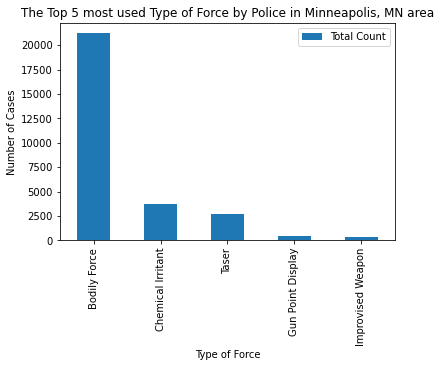

<Figure size 432x288 with 0 Axes>

In [15]:
# create a bar chart to show the Top 5 most used types of force
top5_force_bar_ainash = sorted_ainash.head().plot(kind = 'bar', title = 'The Top 5 most used Type of Force by Police in Minneapolis, MN area')
top5_force_bar_ainash.set_xlabel ('Type of Force')
top5_force_bar_ainash.set_ylabel ('Number of Cases')
plt.show()
plt.tight_layout()

In [16]:
#find all types of force action
force_type_action_ainash = clean_df['Type of Force Action']
force_type_action_ainash.nunique()

41

In [17]:
# find the most used type of force and its action
merged_force_type_data_ainash = clean_df[['Type of Force', 'Type of Force Action', 'Case Number']]
merged_force_type_data_ainash = merged_force_type_data_ainash.groupby(['Type of Force', 'Type of Force Action'])
merged_force_type = merged_force_type_data_ainash['Type of Force Action'].count()
merged_ainash = pd.DataFrame({'Total Count': merged_force_type})
sorted_merged_ainash = merged_ainash.sort_values(['Total Count'], ascending = False)

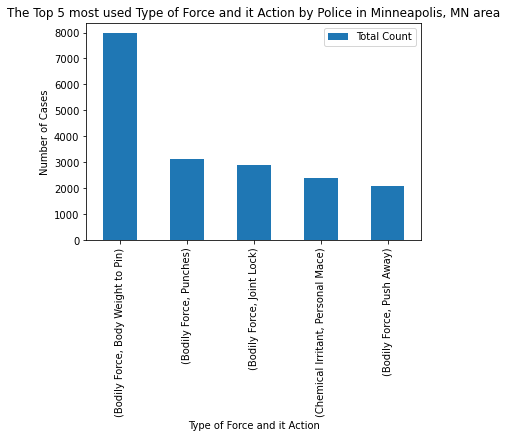

<Figure size 432x288 with 0 Axes>

In [18]:
# create a bar chart to show the Top 5 most used types of force and its action
top5_merged_bar = sorted_merged_ainash.head().plot(kind = 'bar', title = 'The Top 5 most used Type of Force and it Action by Police in Minneapolis, MN area')
top5_merged_bar.set_xlabel ('Type of Force and it Action')
top5_merged_bar.set_ylabel ('Number of Cases')
plt.show()
plt.tight_layout()

In [19]:
# drop ages =0
age_df = clean_df.loc[clean_df['Event Age'] != 0, :]

In [20]:
#create bins for ages
bins = [6,9.9,14.9,19.9,29.9,39.9,49.9,59.9,69.9,79.9,89.9]
group_names = ['6-10', '11-15', '16-20','21-30','31-40','41-50','51-60', '61-70', '71-80', '81 <']

In [21]:
age_df['Age Groups'] = pd.cut(age_df['Event Age'], bins, labels = group_names, include_lowest = True)

C:\Users\szig9\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
age_data_ainash = age_df[['Age Groups', 'Case Number']]
age_data_groupby_ainash = age_data_ainash.groupby('Age Groups')
age_count_ainash = age_data_groupby_ainash['Age Groups'].count()
age_df_ainash = pd.DataFrame({'Total Count': age_count_ainash})

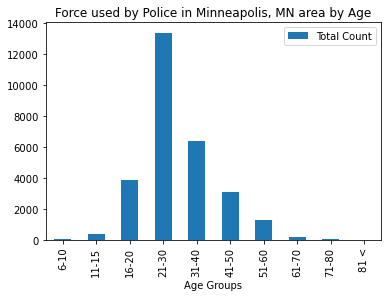

<Figure size 432x288 with 0 Axes>

In [23]:
age_bar_ainash = age_df_ainash.plot(kind = 'bar', title = 'Force used by Police in Minneapolis, MN area by Age')
top5_force_bar_ainash.set_xlabel ('Age Groups')
top5_force_bar_ainash.set_ylabel ('Number of Cases')
plt.show()
plt.tight_layout()

# Types of Force used by Police in Minneapolis,MN Analysis
## When analyzing types of Force used by Police in Minneapolis, Minnesota, we observed that:
* There are 10 types of Force that Police in Minneapolis, MN use in incidents: Bodily Force, Chemical Irritant, Taser, Improvised Weapon, Baton, Police K9 Bite, Firearm, Less Lethal Projectile, Gun Point Display, Maximal Restraint Technique. From these force types, the five most commonly used by law enforcement officers in Minneapolis are: Bodily Force (21212 cases among analyzed data), Chemical Irritant (3780 cases), Taser(2757 cases), Gun Point Display (436 cases) and Improvised weapon (343 cases).
* Types of Force also have sub-categories that are called Types of Force Action. Our data includes 41 types of Force Action. The Top 5 most used Types of Force Action by Police in Minneapolis, MN area are Body Weight to Pin (Bodily Force type), Punches (Bodily Force type), Joint Lock (Bodily Force type), Personal Mace (Chemical Irritant type) and Push Away (Bodily Force type).
* We also decided to analyze the police cases by Age Groups. After analysis of Force Police used by Age Groups, we observed that most commonly, the most force is used on people between age 21-30. 

In [24]:
# Ainash's code ends here

# 3. Which is the most popular type of resistance? (Humera)

In [25]:
popular_data = clean_df["Type of Resistance"].describe(include = "all")
popular_data

count      29075
unique        10
top       Tensed
freq        8120
Name: Type of Resistance, dtype: object

In [26]:
resistance_data = clean_df.groupby("Type of Resistance")
total_count = resistance_data.nunique()["Case Number"]
total_count

Type of Resistance
Assaulted Officer           983
Assaulting Police Horse      26
Assaulting Police K9          9
Commission of Crime        2827
Fled in Vehicle             301
Fled on Foot               2053
Other                       485
Tensed                     3708
Unspecified                1174
Verbal Non-Compliance      1762
Name: Case Number, dtype: int64

In [27]:
incident_data = clean_df.groupby("Type of Crime")
total_count = incident_data.nunique()["Case Number"]
# create a bar chart to show the most used force type
force_bar = sorted_force.plot(kind = 'bar', title = 'Used Type of Force by Police in Minneapolis, MN area')
force_bar.set_xlabel ('Type of Force')
force_bar.set_ylabel ('Number of Cases')
plt.show()
plt.tight_layout()resistance_data = clean_df.groupby("Type Of Resistance")
total_count = resistance_data.nunique()["Case Number"]

resistance = pd.DataFrame({"Total Count": total_count})
resistance_case_no = resistance.sort_values("Total Count", ascending=False)

resistance_case_no.index.name = "Type Of Resistance"
resistance_case_no.head()resistance = pd.DataFrame({"Total Count": total_count})
top_resistance = resistance.sort_values("Total Count", ascending=False)
top_resistance

SyntaxError: invalid syntax (<ipython-input-27-ba017a9b68b1>, line 8)

In [28]:
top_resistance.index.name = "Resistance"
top_resistance.head()

NameError: name 'top_resistance' is not defined

In [29]:
top_resistance.head(5).plot(kind="barh",edgecolor="black", facecolor="purple", fontsize=10)
plt.title("Top 10 Resistances Resulting in Use of Police Force in Minneapolis, MN")
plt.ylabel("Number of Cases", fontsize=12)
plt.xlabel("Resistance", fontsize=12)
#plt.tight_layout()
plt.show()

NameError: name 'top_resistance' is not defined

In [30]:
#Pie chart
colors = ['gold', 'red', 'pink', 'blue', 'lightskyblue']
explode = (0.1, 0, 0, 0, 0)
top_resistance.head(5).plot(kind="pie",explode=explode, colors=colors, autopct= "%1.1f%%", subplots="False", shadow=True, startangle=150 )
plt.title('Top 5 - Type of Resistance Resulting in Use of Police Force in Minneapolis', fontsize=10)
plt.axis('equal')
plt.tight_layout()
plt.show()

NameError: name 'top_resistance' is not defined

In [31]:
# Type of Resistance and Force Type Vs Number of Cases
ft_tr = clean_df.groupby(['Type of Resistance','Type of Force'])
ft_tr.count().head()

Police ID  Case Number  Response Date  \
Type of Resistance Type of Force                                              
Assaulted Officer  Baton                      6            6              6   
                   Bodily Force            2660         2660           2660   
                   Chemical Irritant        156          156            156   
                   Firearm                    9            9              9   
                   Gun Point Display         24           24             24   

                                      Type of Crime  Type of Force Action  \
Type of Resistance Type of Force                                            
Assaulted Officer  Baton                          6                     6   
                   Bodily Force                2660                  2660   
                   Chemical Irritant            156                   156   
                   Firearm                        9                     9   
                   Gun Point Display             24                    24   

                                      Event Age  Precinct  Neighborhood  
Type of Resistance Type of Force                                         
Assaulted Officer  Baton                      6         6             6  
                   Bodily Force            2660      2660          2660  
                   Chemical Irritant        156       156           156  
                   Firearm                    9         9             9  
                   Gun Point Display         24        24            24

In [32]:
# Top 5 - Type of Resistance and Force Type Vs Number of Cases
ft_tr= clean_df.groupby(['Type of Resistance','Type of Force'])
total_count = ft_tr.nunique()["Case Number"]
forcetype_resistance = pd.DataFrame({"Total Count": total_count})
forcetype_resistance = forcetype_resistance.sort_values("Total Count", ascending=False)
forcetype_resistance.head()

,,Total Count
Type of Resistance,Type of Force,
Tensed,Bodily Force,3248
Commission of Crime,Bodily Force,1683
Fled on Foot,Bodily Force,1618
Commission of Crime,Chemical Irritant,1101
Verbal Non-Compliance,Bodily Force,1042


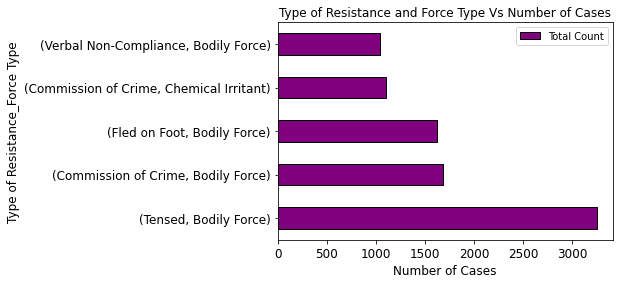

In [33]:
# Type of Resistance and Force Type Vs Number of Cases
forcetype_resistance.head(5).plot(kind="barh",edgecolor="black", facecolor="purple", fontsize=12, align="center", alpha=1.0)
plt.title("Type of Resistance and Force Type Vs Number of Cases")
plt.ylabel("Type of Resistance_Force Type", fontsize=12)
plt.xlabel("Number of Cases", fontsize=12)
plt.show()

In [34]:
# Type of Resistance and Type of Crime Vs Number of Cases
tr_cr = clean_df.groupby(['Type of Resistance','Type of Crime'])
tr_cr.count().head(5)

Police ID  Case Number  \
Type of Resistance Type of Crime                                    
Assaulted Officer  Animal Call                     1            1   
                   Assault Report Only             2            2   
                   Assault in Progress           200          200   
                   Assist EMS Personnel           34           34   
                   Assist Fire Personnel          11           11   

                                           Response Date  Type of Force  \
Type of Resistance Type of Crime                                          
Assaulted Officer  Animal Call                         1              1   
                   Assault Report Only                 2              2   
                   Assault in Progress               200            200   
                   Assist EMS Personnel               34             34   
                   Assist Fire Personnel              11             11   

                                           Type of Force Action  Event Age  \
Type of Resistance Type of Crime                                             
Assaulted Officer  Animal Call                                1          1   
                   Assault Report Only                        2          2   
                   Assault in Progress                      200        200   
                   Assist EMS Personnel                      34         34   
                   Assist Fire Personnel                     11         11   

                                           Precinct  Neighborhood  
Type of Resistance Type of Crime                                   
Assaulted Officer  Animal Call                    1             1  
                   Assault Report Only            2             2  
                   Assault in Progress          200           200  
                   Assist EMS Personnel          34            34  
                   Assist Fire Personnel         11            11

In [35]:
# Top 5 -Type of Resistance and Type of Crime Vs Number of Cases
tr_cr= clean_df.groupby(['Type of Resistance','Type of Crime'])
total_count = tr_cr.nunique()["Case Number"]
resistance_crime = pd.DataFrame({"Total Count": total_count})
resistance_crime = resistance_crime.sort_values("Total Count", ascending=False)
resistance_crime.head()

Total Count
Type of Resistance  Type of Crime                  
Tensed              Suspicious Person           775
Commission of Crime Fight                       618
                    Suspicious Person           508
Fled on Foot        Suspicious Person           478
Commission of Crime Disturbance                 346

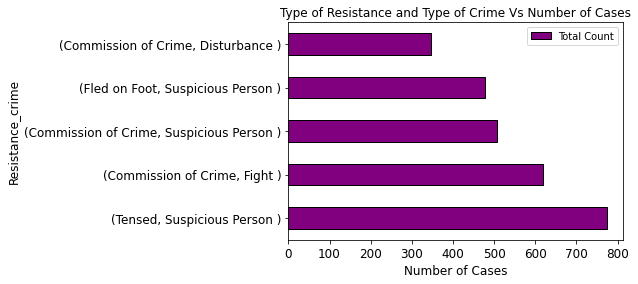

In [36]:
# Top 5 - Type of Resistance and Type of Crime Vs Number of Cases
resistance_crime.head(5).plot(kind="barh",edgecolor="black", facecolor="purple", fontsize=12, align="center", alpha=1.0)
plt.title("Type of Resistance and Type of Crime Vs Number of Cases")
plt.ylabel("Resistance_crime", fontsize=12)
plt.xlabel("Number of Cases", fontsize=12)
plt.show()

In [37]:
# Type of Resistance and Type of Crime Vs Number of Cases
tr_rd = clean_df.groupby(['Type of Resistance','Event Age'])
tr_rd.count().head(5)

Police ID  Case Number  Response Date  \
Type of Resistance Event Age                                          
Assaulted Officer  0.0               26           26             26   
                   9.0                3            3              3   
                   13.0              13           13             13   
                   14.0              33           33             33   
                   15.0              43           43             43   

                              Type of Crime  Type of Force  \
Type of Resistance Event Age                                 
Assaulted Officer  0.0                   26             26   
                   9.0                    3              3   
                   13.0                  13             13   
                   14.0                  33             33   
                   15.0                  43             43   

                              Type of Force Action  Precinct  Neighborhood  
Type of Resistance Event Age                                                
Assaulted Officer  0.0                          26        26            26  
                   9.0                           3         3             3  
                   13.0                         13        13            13  
                   14.0                         33        33            33  
                   15.0                         43        43            43

In [38]:
tr_rd= clean_df.groupby(['Type of Resistance','Event Age'])
total_count = tr_rd.nunique()["Case Number"]
resistance_age = pd.DataFrame({"Total Count": total_count})
resistance_age = resistance_age.sort_values("Total Count", ascending=False)
resistance_age.head()

Total Count
Type of Resistance  Event Age             
Commission of Crime 21.0               285
                    20.0               215
Tensed              25.0               193
                    23.0               192
                    24.0               186

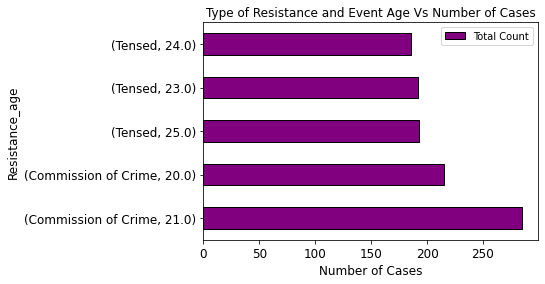

In [39]:
# Top 5 - Type of Resistance and Event Age Vs Number of Cases
resistance_age.head(5).plot(kind="barh",edgecolor="black", facecolor="purple", fontsize=12, align="center", alpha=1.0)
plt.title("Type of Resistance and Event Age Vs Number of Cases")
plt.ylabel("Resistance_age", fontsize=12)
plt.xlabel("Number of Cases", fontsize=12)
plt.show()

# Analysis - Types of Resistance used towards Police Force in Minneapolis 


We analysed the most popular type of resistance by:-

. creating a dataframe with type of resistance and found the Total count was 29075 and freq is 8120 and the most common              resistance seen was getting tensed.

. Creating a groupby with type of Resistance and case number, found top resistances were being Tensed(3708), committed verbal        Non-compliance(1762), Assaulted an Officer (983), fled in a vehicle(301).


Type of Resistance and Force Type Vs Number of Cases - The most type of resistance used against 
bodily force was either being Tensed or commission of Crime or Fled on Foot.

Type of Resistance and Type of Crime Vs Number of Cases - if the crime was of suspicious person then the resistance was being tensed or fled on foot.
whereas if the type of crime was fight then resistance was commission of crime.

Type of Resistance and Event Age Vs Number of Cases - most type of resistance used was being Tensed and commission of crime between the ages of 21 and 25.


In [40]:
# Humera's code ends here

# 4. Which neighborhood in Minneapolis contains the highest frequency of police force? (Mike Hills)

In [41]:
#pull out neighborhood and forcetype from clean df
#group by neighborhood and calculate the total force count per neighborhood
force_per_neighborhood_df = clean_df.loc[:,['Neighborhood','Type of Force']]
force_group = force_per_neighborhood_df.groupby('Neighborhood')
sum_neigh = force_group['Type of Force'].count()

#place results into new df, sort by force count from highest to lowest; store and display
force_per_neighborhood_df = pd.DataFrame({'Force Count': sum_neigh})
sorted_force_df = force_per_neighborhood_df.sort_values(['Force Count'], ascending=False)
sorted_force_df

,Force Count
Neighborhood,
Downtown West,7535
Jordan,1429
Near - North,1294
Hawthorne,1288
Willard - Hay,987
...,...
Hale,22
Page,14
Camden Industrial,13


In [42]:
#store top 5 highest total force per neighborhood into its own df and display
top5force_df = sorted_force_df.head(5)
top5force_df

,Force Count
Neighborhood,
Downtown West,7535
Jordan,1429
Near - North,1294
Hawthorne,1288
Willard - Hay,987


Text(0.5, 1.0, 'Minneapolis Police Use of Force Distribution per Neighborhood: 5 Highest\n(2008-2021)')

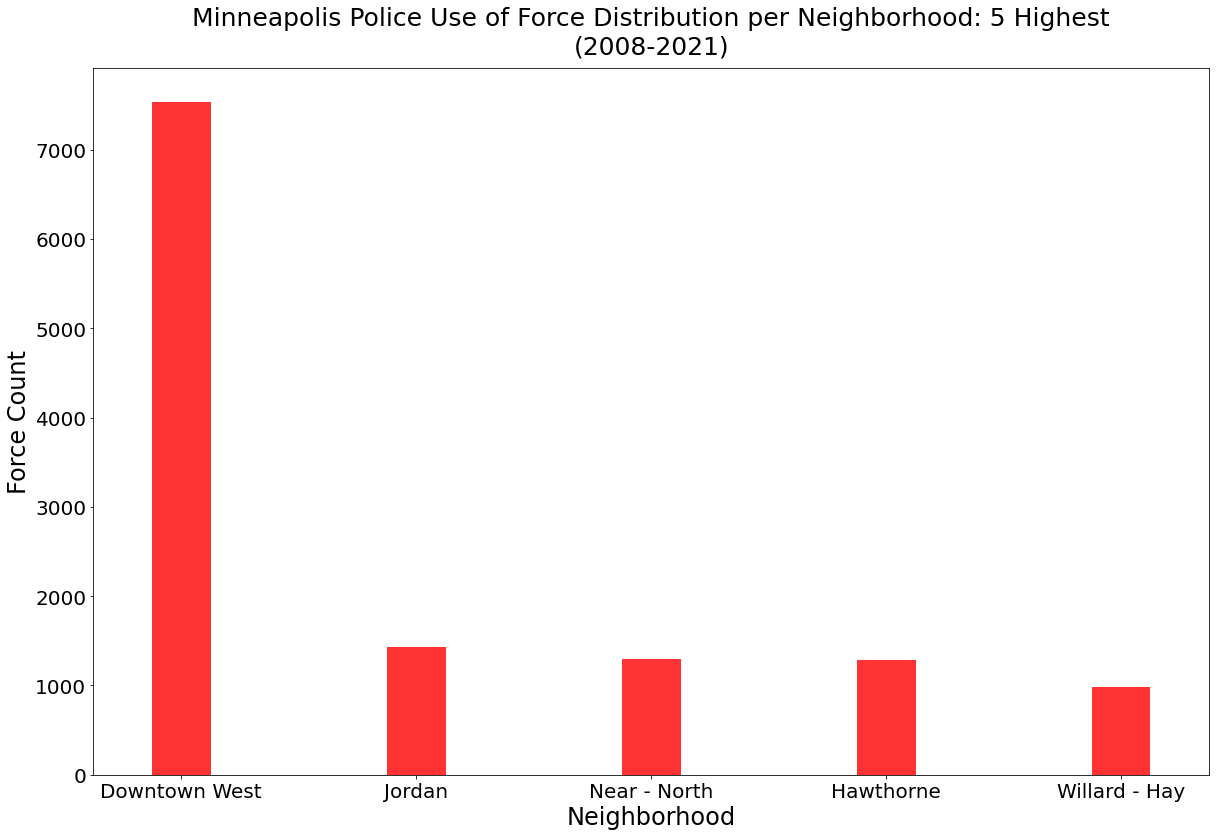

In [43]:
Top5bar = top5force_df.plot(kind="bar", figsize=(20,13), width=.25, color="red", alpha=.8, rot=0, fontsize=20, legend=False)
Top5bar.set_ylabel('Force Count',fontdict={'fontsize':24})
Top5bar.set_xlabel('Neighborhood',fontdict={'fontsize':24})
Top5bar.set_title('Minneapolis Police Use of Force Distribution per Neighborhood: 5 Highest' + '\n' + '(2008-2021)', pad=15,fontdict={'fontsize':25})

In [44]:
#find and store neighborhood with highest force count
worst_neigh = sorted_force_df.index[0]

#find and store highest force count
top1force = top5force_df['Force Count'][0]

#remove highest force count row and store into new df
top1_clean_df = force_per_neighborhood_df.loc[force_per_neighborhood_df['Force Count'] < top1force]

#calculate total force count for all neighborhoods combined except for the highest force neighborhood
sumforce = top1_clean_df['Force Count'].sum()

In [45]:

#create dictionary to store values for summarized df
dict = {'Minneapolis Neighborhoods (Total:86)':[worst_neigh, "All Others"], 
        'Force Count': [top1force, sumforce]}

#pass dict into pd.DataFrame to generate df
Topvsrest_df = pd.DataFrame(dict)

#set index to "Minneapolis Neighborhoods (Total:86)" and display
Topvsrest_df = Topvsrest_df.set_index('Minneapolis Neighborhoods (Total:86)')

#df showing force count for highest frequency neighborhood vs. all others
Topvsrest_df

,Force Count
Minneapolis Neighborhoods (Total:86),
Downtown West,7535
All Others,21540


Text(0.5, 1.0, 'Minneapolis Police Use of Force\n(2008-2021)')

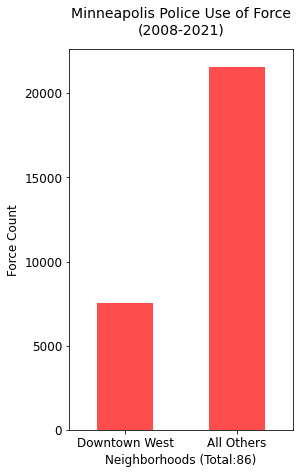

In [46]:
#create bar chart to show relative comparison distribution for highest frequency neighborhood vs. all others
Topvsrest_bar = Topvsrest_df.plot(kind="bar", figsize=(4,7), width=.5, color="red", alpha=.7, rot=0, fontsize=12, legend=False)
Topvsrest_bar.set_ylabel('Force Count',fontdict={'fontsize':12})
Topvsrest_bar.set_xlabel('Neighborhoods (Total:86)',fontdict={'fontsize':12})
Topvsrest_bar.set_title('Minneapolis Police Use of Force' + '\n' + '(2008-2021)', pad=15,fontdict={'fontsize':14})

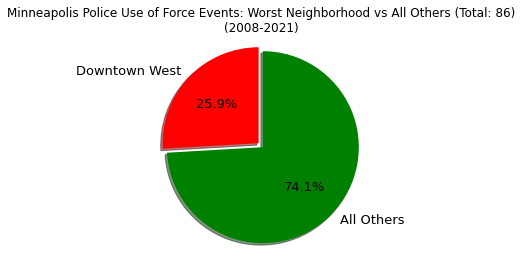

In [47]:
#create pie chart to show percentage distribution of highest frequency neighborhoods vs. all others 
x = [top1force,sumforce]
explode = (.06,0)
textprops = {"fontsize":13}
colors = ["red","green"]
labels = ['Downtown West','All Others']

plt.pie(x, labels=labels, textprops=textprops, explode=explode, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Minneapolis Police Use of Force Events: Worst Neighborhood vs All Others (Total: 86)" + "\n" + "(2008-2021)")

plt.show()


# Findings and Analysis: Which neighborhood in Minneapolis contains the highest frequency of police force?

•	Of 86 total neighborhoods in Minneapolis, “Downtown West” contained 25.9% of all police use of force events from 2008 – 2021, with a force count of 7,535 out of 29,075 total use of force events.

•	Of the top 5 neighborhoods with the highest use of force, Downtown West contained the majority, or 60% of the total use of force.

•	Some potential avenues of analysis to help explain the skewed distribution of force events per neighborhood could be:
-	Variability of poverty and socioeconomic distribution of each neighborhood compared to the entire city of Minneapolis.
-	Geographic distribution of race and gender by neighborhood, which could indicate a certain probability of racial and/or gender profiling bias by police. 

(Note: Our data analysis omitted gender and race data from the original CSV to avoid questionable-cause logical fallacies.  However, these data could be useful in illustrating trends or biases within the psychology of individuals and/or the psychosociology of society, which is beyond the scope of our analysis.)


In [48]:
# Mike H's code ends here

# 5. Is the use of police force in Minneapolis going up or down? (Mike F)

C:\Users\szig9\anaconda3\envs\PythonData\lib\site-packages\pandas\core\arrays\datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


The number of unique months with recorded data is 158


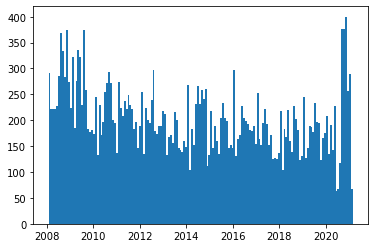

In [49]:
#Make a basic histogram, sorted by month, of incidents of police force used.
import datetime;
police_data_time_df = police_data.loc[:, ["PoliceUseOfForceID", "CaseNumber", "ResponseDate", "Problem", "ForceType",
                                    "ForceTypeAction", "EventAge"]];
police_data_time_df["Month"] = pd.to_datetime(police_data_time_df["ResponseDate"]).dt.to_period('m');
police_data_time_df["MonthNumeric"] = police_data_time_df["Month"].apply(lambda x: int(str(x)[0:4]) + (int(str(x)[5:7])) / 12);
police_data_time_df = police_data_time_df[police_data_time_df["MonthNumeric"]>=2008];
print(f'The number of unique months with recorded data is {len(police_data_time_df["MonthNumeric"].unique())}');
timehist = plt.hist(police_data_time_df["MonthNumeric"], bins=158);


TypeError: 'str' object is not callable

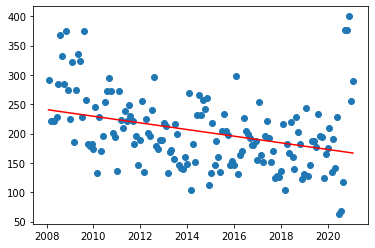

In [56]:
#Make a dictionary of incidents, indexed by months since 2008.
monthIndex = {}
#Month 1 represents January, 2008
for x in range(1,158):
    #monthEquiv is the value for that month in the police_data_time_df dataframe
    monthEquiv = 2008+(x/12)
    monthIndex[x] = [round(monthEquiv,2), len(police_data_time_df[police_data_time_df["MonthNumeric"]==monthEquiv])]

incidents_by_month_df = pd.DataFrame.from_dict(monthIndex, orient='index', columns=["Month","Incidents"])
#Overall Data
timeplot = plt.scatter(incidents_by_month_df["Month"],incidents_by_month_df["Incidents"])
#Linear Regression Code
(slope, intercept, rvalue, pvalue, stderr) = linregress(incidents_by_month_df["Month"], incidents_by_month_df["Incidents"])
regress_values = incidents_by_month_df["Month"] * slope + intercept
plt.plot(incidents_by_month_df["Month"],regress_values,"r-")

plt.show()

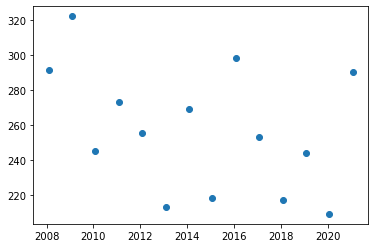

In [51]:
#The data appears to have a strong cyclical trend, possibly according to time of year.
#In order to see if this is relevant, we'll separate these data sets by month and see if they have a more smooth pattern over
#multiple years.

#incidents_by_month_df

incidents_jan = incidents_by_month_df[(incidents_by_month_df.index%12)==1]
plt.scatter(incidents_jan["Month"],incidents_jan["Incidents"])

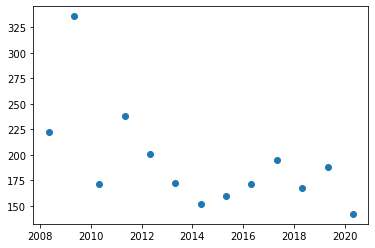

In [52]:
incidents_april = incidents_by_month_df[(incidents_by_month_df.index%12)==4]
plt.scatter(incidents_april["Month"],incidents_april["Incidents"])

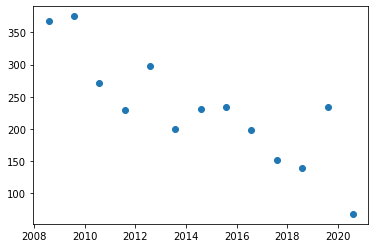

In [53]:
incidents_july = incidents_by_month_df[(incidents_by_month_df.index%12)==7]
plt.scatter(incidents_july["Month"],incidents_july["Incidents"])

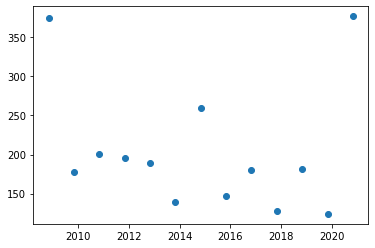

In [54]:
incidents_october = incidents_by_month_df[(incidents_by_month_df.index%12)==10]
plt.scatter(incidents_october["Month"],incidents_october["Incidents"])

For the selected tested months, there does not actually seem to be a consistent trend, which is strong evidence against the hypothesis that there is a cyclical or seasonal influence on police uses of force. If this trend were to explain the intra-year variances between months, then the scatter plots of uses of force by month would be much closer to a linear progression instead of the unpredictable rises and falls that are actually seen upon filtering by month.

##Overall data indicates a downward trend in overall police use of force.
There are several things to consider in this - that the data is highly variable from month to month, and that the overall trend is downward, but that there is a significant rise at the end of the data. This suggests that police use of force is correlated with ongoing political changes that themselves have an overall trend, but that exhibit significant variation. The lowest months on record are mid to late 2020, which correspond to an increase in discourse of police use of force after the high-profile case of George Floyd, who was killed by excessive and unwarranted use of police force, which resulted in intense public scrutiny of police force used. That police use of force rebounded abruptly in 2021 is troubling and warrants further scrutiny.

In [ ]:
# Mike F's code ends here

# 6. Perform a linear regression on use of force between 2015 and 2019 and make a prediction about use of force in 2020 for the city of Minneapolis.  Compare this prediction to actual use of force outcomes in 2020. (Mike H)

In [ ]:
#pull out Response Date and Type of Force from clean df and store
date_force_df = clean_df.loc[:,['Response Date','Type of Force']]

#find all response dates containing 2015 - 2019 and store
searchfor = ['2015', '2016', '2017', '2018', '2019']
df_2015_2019 = date_force_df[date_force_df['Response Date'].str.contains('|'.join(searchfor))]

#divide 2015 - 2019 in separate dfs
df_2015 = date_force_df[date_force_df['Response Date'].str.contains("2015")]
df_2016 = date_force_df[date_force_df['Response Date'].str.contains("2016")]
df_2017 = date_force_df[date_force_df['Response Date'].str.contains("2017")]
df_2018 = date_force_df[date_force_df['Response Date'].str.contains("2018")]
df_2019 = date_force_df[date_force_df['Response Date'].str.contains("2019")]

#store 2020 df
df_2020 = date_force_df[date_force_df['Response Date'].str.contains("2020")]

#display condensed df with only response date and type of force
date_force_df

In [ ]:
#checking to make sure the length of 2015 - 2019 dfs is equal to length of 2015-2019 dfs to ensure no missing values
len(df_2015_2019) == len(df_2015) + len(df_2016) + len(df_2017) + len(df_2018) + len(df_2019)

In [ ]:
#summary stats
#total force incidents from 2015 - 2020
TotalIncidents = len(df_2015_2019) + len(df_2020)
TotalIncidents

In [ ]:
#mean force incidents per year
MeanIncidents = TotalIncidents / 6
MeanIncidents

In [ ]:
#total number of each type force incidents per year
breakdown = date_force_df['Type of Force'].value_counts()
breakdown

In [ ]:
#find and store total bodily force incidents for each year
sum2015 = df_2015['Type of Force'].count()
sum2016 = df_2016['Type of Force'].count()
sum2017 = df_2017['Type of Force'].count()
sum2018 = df_2018['Type of Force'].count()
sum2019 = df_2019['Type of Force'].count()

#create dictionary of total bodily force incidents for each year
dict = {'Year':[2015,2016,2017,2018,2019], 
        'Total Bodily Force Incidents': [sum2015,sum2016,sum2017,sum2018,sum2019]}

#pass dict into pd.DataFrame to generate df
tot_bodyforce_df = pd.DataFrame(dict)
tot_bodyforce_df

In [ ]:
#find and store years for x-values
year = tot_bodyforce_df.iloc[:,0]

#store year 2020
year2020 = 2020

#find and store total bodily force incidents for 2020
totbodyforce2020 = len(df_2020)

#find and store total bodily force incidents per year for y-values
tot_bodyforce = tot_bodyforce_df.iloc[:,1]

plt.xlabel('Year')
plt.ylabel('Total Bodily Force Incidents')
plt.xticks(year)

#perform a linear regression on total bodily force incidents versus years 2015 - 2020
bf_slope, bf_int, bf_r, bf_p, bf_std_err = stats.linregress(year, tot_bodyforce)

#create equation of line to calculate predicted total bodily force incidents
bf_fit = bf_slope * year + bf_int

#plot the linear model on top of scatter plot
plt.scatter(year, tot_bodyforce)
plt.plot(year,bf_fit,"--")

print(f"The r-squared is: {bf_r**2}")
plt.show()

In [ ]:
#store total incidents per type of force for each year
force_counts_2015 = df_2015['Type of Force'].value_counts()
force_counts_2016 = df_2016['Type of Force'].value_counts()
force_counts_2017 = df_2017['Type of Force'].value_counts()
force_counts_2018 = df_2018['Type of Force'].value_counts()
force_counts_2019 = df_2019['Type of Force'].value_counts()
force_counts_2020 = df_2020['Type of Force'].value_counts()

#store bodily force incidents (*NOT TOTAL BODILY FORCE INCIDENTS*) for each year
bodilyforce2020 = force_counts_2020.loc['Bodily Force']
bodilyforce2019 = force_counts_2019.loc['Bodily Force']
bodilyforce2018 = force_counts_2018.loc['Bodily Force']
bodilyforce2017 = force_counts_2017.loc['Bodily Force']
bodilyforce2016 = force_counts_2016.loc['Bodily Force']
bodilyforce2015 = force_counts_2015.loc['Bodily Force']

#create dictionary of bodily force incidents for each year
dict = {'year':[2015,2016,2017,2018,2019], 
        'Bodily Force Count': [bodilyforce2015,bodilyforce2016,bodilyforce2017,bodilyforce2018,bodilyforce2019]}

#pass dict into pd.DataFrame to generate df
bodyforce_df = pd.DataFrame(dict)
bodyforce_count = bodyforce_df['Bodily Force Count']

#store start year and end year for subplots
startyear = bodyforce_df['year'].min()
endyear = bodyforce_df['year'].max()

b_slope, b_int, b_r, b_p, b_std_err = stats.linregress(year, bodyforce_count)

b_fit = b_slope * year + b_int

#find and store body force incidents for 2020
bodyforce2020 = len(df_2020.loc[df_2020['Type of Force'] == "Bodily Force"])

In [ ]:
#find and store taser incidents for each year
taser2020 = force_counts_2020.loc['Taser']
taser2019 = force_counts_2019.loc['Taser']
taser2018 = force_counts_2018.loc['Taser']
taser2017 = force_counts_2017.loc['Taser']
taser2016 = force_counts_2016.loc['Taser']
taser2015 = force_counts_2015.loc['Taser']

#create dictionary of taser incidents for each year
dict = {'year':[2015,2016,2017,2018,2019], 
        'Taser Count': [taser2015,taser2016,taser2017,taser2018,taser2019]}

#pass dict into pd.DataFrame to generate df
taser_df = pd.DataFrame(dict)
taser_count = taser_df['Taser Count']

t_slope, t_int, t_r, t_p, t_std_err = stats.linregress(year, taser_count)

t_fit = t_slope * year + t_int

taser2020 = len(df_2020.loc[df_2020['Type of Force'] == "Taser"])

In [ ]:
#find and store chemical irritant incidents for each year
chem2020 = force_counts_2020.loc['Chemical Irritant']
chem2019 = force_counts_2019.loc['Chemical Irritant']
chem2018 = force_counts_2018.loc['Chemical Irritant']
chem2017 = force_counts_2017.loc['Chemical Irritant']
chem2016 = force_counts_2016.loc['Chemical Irritant']
chem2015 = force_counts_2015.loc['Chemical Irritant']

dict = {'year':[2015,2016,2017,2018,2019], 
        'Chemical Irritant Count': [chem2015,chem2016,chem2017,chem2018,chem2019]}

#pass dict into pd.DataFrame to generate df
chem_df = pd.DataFrame(dict)
chem_count = chem_df['Chemical Irritant Count']

c_slope, c_int, c_r, c_p, c_std_err = stats.linregress(year, chem_count)

c_fit = c_slope * year + c_int

chem2020 = len(df_2020.loc[df_2020['Type of Force'] == "Chemical Irritant"])

In [ ]:
#generate subplots of bodily force, taser, chemical irritant, and total incidents
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(sharex=True, nrows=2, ncols=2, gridspec_kw={'width_ratios': [3, 3]})
fig.suptitle("Bodily Force Incidents", fontsize=13, fontweight="bold")

ax1.set_xlim(startyear, endyear)
ax1.plot(year, taser_count, linewidth=1, marker="o")
ax1.plot(year, t_fit, "b--", linewidth=1)
ax1.set_ylabel("Taser")

ax2.plot(year, bodyforce_count, linewidth=1, marker="o", color="r")
ax2.plot(year, b_fit, "r--", linewidth=1)
ax2.set_ylabel("Bodily Force")

ax3.plot(year, chem_count, linewidth=1, marker="o", color="b")
ax3.plot(year, c_fit, "b--", linewidth=1)
ax3.set_ylabel("Chemical Irritant")
ax3.set_xlabel("Year")

ax4.plot(year, tot_bodyforce, linewidth=1, marker="o", color="g")
ax4.plot(year, bf_fit, "g--", linewidth=1)
ax4.set_ylabel("Total Incidents")
ax4.set_xlabel("Year")

plt.tight_layout(pad=2)
plt.show()

In [ ]:
#print out actual versus predicted incidents for each graph

print(f"The total taser incidents in 2020 will be {round(t_slope * year2020 + t_int,0)}.")
print(f"The actual total taser incidents in 2020 were {taser2020}.\n")

print(f"The total bodily force incidents in 2020 will be {round(b_slope * year2020 + b_int,0)}.")
print(f"The actual total bodily force incidents in 2020 were {bodyforce2020}.\n")

print(f"The total chemical irritant incidents in 2020 will be {round(c_slope * year2020 + c_int,0)}.")
print(f"The actual total chemical irritant incidents in 2020 were {chem2020}.\n")

print(f"The total force incidents in 2020 will be {round(bf_slope * year2020 + bf_int,0)}.")
print(f"The actual total force incidents in 2020 were {totbodyforce2020}.")

# Linear Regression Analysis

•	The total incidents of force were calculated based on 10 “Type of Force” categories, while 3 were chosen at random for observational comparison:  “Chemical Irritant”, “Taser”, and “Bodily Force.”

•	Based on the subplots, Taser showed an overall increase, Bodily Force showed an overall decrease, with a slight increase from 2017 to 2019, and Chemical Irritant showed a sharp overall decrease.  From this we can observe that Taser and Bodily Force slowed the overall downward trend in total incidents, particularly from years 2017 – 2019, while Chemical Irritant followed the overall downward trend.

•	The total number of bodily force incidents between 2015 and 2020 was 11,355 with an average of 1,893 incidents per year.  A plot of total bodily force vs. year for 2015 – 2019 shows a downward trend in use of force.  A linear regression model follows this trend with an r-squared value of 0.750, implying that 75% of the observed data fits the regression model.  

•	Total incidents for 2015 and 2020 were 2,038 and 1,718, respectively, showing a drop in use of force by 15.7%.  

•	Based on the regression model, the predicted use of force events in 2020 was 1,595, which is 7% lower than the actual use of force in 2020.

•	Overall, the regression model predicted all four analyzed categories of force to be lower than actual, but the observed data still trends closely toward the direction of the predictions.
